In [1]:
using Gadfly
using Interact

In [37]:
set_default_plot_size(25cm, 25cm)

In [4]:
function MPK(A, K, L, α)
    return A*α*K^(α-1)*L^(1-α)
end

function MPL(A, K, L, α)
    return A*(1-α)*K^α*L^(-α)
end

function BC(w_P, r_P, L_S, K_S, δ, C)
    return w_p*L_S+(r_p-δ)*K_S - C
end;

MPL (generic function with 1 method)

In [ ]:
A0 = 5
L_S=50
K_S=50
α=0.5
w_P0 = MPL(A0, K_S, L_S, α)
r_P0 = MPK(A0, K_S, L_S, α)

domain = linspace(0, 400, 100)
dY_dL_fixed = []
dY_dK_fixed = []

for level in domain 
    push!(dY_dL_fixed, MPL(5, K_S, level, α)) 
    push!(dY_dK_fixed, MPK(5, level, L_S, α))
end;

Interact.Options{:SelectionSlider,Any}(115: "input-33" = 5 Any , "A", 5, "5", 5, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict{Any,Any}(Pair{Any,Any}(7, "7"),Pair{Any,Any}(4, "4"),Pair{Any,Any}(9, "9"),Pair{Any,Any}(10, "10"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(3, "3"),Pair{Any,Any}(5, "5"),Pair{Any,Any}(8, "8"),Pair{Any,Any}(6, "6"),Pair{Any,Any}(1, "1")…)), Any[], Any[], true, "horizontal")

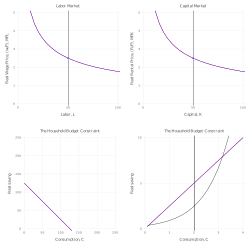

In [48]:
@manipulate for A in 1:10
    
    w_P = MPL(A, K_S, L_S, α)
    r_P = MPK(A, K_S, L_S, α)
    
    # Labor Market
    dY_dL = []
    for level_L in domain push!(dY_dL, MPL(A, K_S, level_L, α)) end    
    
    labor_market = plot(
        layer(x=[L_S], y=[w_P0], Geom.point, Theme(default_color=colorant"blue")),
        layer(x=[L_S], y=[w_P], Geom.point, Theme(default_color=colorant"red")),
        layer(xintercept=[L_S], Geom.vline(color=["black"])),
        layer(x=domain, y=dY_dL_fixed, Geom.line, Theme(default_color=colorant"blue")),
        layer(x=domain, y=dY_dL, Geom.line, Theme(default_color=colorant"red")),
        Coord.Cartesian(xmin=0,xmax=100,ymin=0,ymax=5),
        Guide.Title("Labor Market"),
        Guide.xlabel("Labor, L"),
        Guide.ylabel("Real Wage Price, (w/P), MPL")
        )
    
    # Capital Market
    dY_dK = []
    for level_K in domain push!(dY_dK, MPK(A, level_K, L_S, α)) end
    
    capital_market = plot(
        layer(x=[K_S], y=[r_P0], Geom.point, Theme(default_color=colorant"blue")),
        layer(x=[K_S], y=[r_P], Geom.point, Theme(default_color=colorant"red")),
        layer(xintercept=[K_S], Geom.vline(color=["black"])),
        layer(x=domain, y=dY_dK_fixed, Geom.line, Theme(default_color=colorant"blue")),
        layer(x=domain, y=dY_dK, Geom.line, Theme(default_color=colorant"red")),
        Coord.Cartesian(xmin=0,xmax=100,ymin=0,ymax=5),
        Guide.Title("Capital Market"),
        Guide.xlabel("Capital, K"),
        Guide.ylabel("Real Rental Price, (R/P), MPK")
        )

    # Budget
    k0 = log.(3*r_P0)
    k = log.(3*r_P)
    
    budget = plot(
        layer(x=domain, y=BC(w_P0, r_P0, L_S, K_S*k0, (1/3)*e^k0, domain), Geom.line, Theme(default_color=colorant"blue")),
        layer(x=domain, y=BC(w_P, r_P, L_S, K_S*k, (1/3)*e^k, domain), Geom.line, Theme(default_color=colorant"red")),
        Coord.Cartesian(xmin=0,xmax=250,ymin=0,ymax=250, fixed=true),
        Guide.Title("The Household Budget Constraint"),
        Guide.xlabel("Consumption, C"),
        Guide.ylabel("Real saving")
        )
    
    # k_rate
        
    depreciation = []
    k_domain=linspace(0.1, 4, 20)
    for k_level in k_domain push!(depreciation, (1/3)*e^k_level) end
    
    k_rate = plot(
        layer(x=k_domain, y=depreciation, Geom.line, Theme(default_color=colorant"black")),
        layer(x=k_domain, y=k_domain*r_P0, Geom.line, Theme(default_color=colorant"blue")),
        layer(x=k_domain, y=k_domain*r_P, Geom.line, Theme(default_color=colorant"red")),
        layer(xintercept=[k0], Geom.vline(color=["black"])),
        layer(xintercept=[k], Geom.vline(color=["grey"])),
        Coord.Cartesian(xmin=0,xmax=4,ymin=0,ymax=10),
        Guide.Title("The Household Budget Constraint"),
        Guide.xlabel("Consumption, C"),
        Guide.ylabel("Real saving")
        )
    
    gridstack([labor_market capital_market; budget k_rate])
end

<br>